[ 4  4  4  4  4  4  4  4  4  4  4  3  2  1  0 -1 -2 -3 -4 -5 -6 -6 -6 -6
 -6 -6 -6 -6 -6 -6 -6 -5 -4 -3 -2 -1  0  1  2  3  4  4  4  4  4  4  4  4
  4  4]
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]


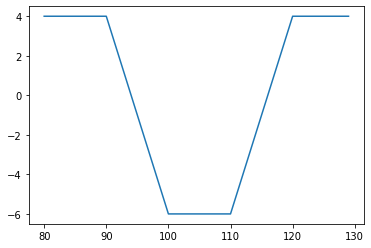

In [28]:
#estrategia cóndor
import numpy as np
import matplotlib.pyplot as plt  


#definimos el tipo de estrategia cóndor: "comprado" o "vendido"
tipo_estrategia = "Vendido"

#establecemos el precio de ejercicio de las opciones call
pe_A = 90
pe_B = 100
pe_C = 110
pe_D = 120

#también establecemos su prima, es decir el valor de la opción
prima_A = 4
prima_B = 2
prima_C = 2
prima_D = 4

#y la cantidad de opciones
cantidad_A = 1
cantidad_B = 1
cantidad_C = 1
cantidad_D = 1

#creamos una horquilla imaginaria de precios para el bien subyacente
#tiene que extenderse más allá del precio más bajo y más alto de las opciones
margen = 10

#usamos la función range. Queremos la lista de todos los precios posibles, para imprimirla al final
S = [*range(pe_A - margen, pe_D + margen)]
S

#ahora creamos vectores para almacenar el valor de cada opción en cada nivel de S
#de momento esos vectores sólo tienen ceros
valor_A = [0]*len(S)
valor_B = [0]*len(S)
valor_C = [0]*len(S)
valor_D = [0]*len(S)

#con una estrategia de cóndor comprado la secuencia de operaciones con opciones es: compra-venta-venta-compra
#con una estrategia de cóndor vendido la secuencia es: venta-compra-compra-venta

#para las opciones de compra, si S < pe, el valor de la opción es negativo
#porque el tenedor de la opción incurre el coste de la prima
#si S > pe, el valor de la opción es: S - pe - prima

#opción A
for i in range(0, len(S)):
  if S[i] < pe_A:
    valor_A[i] = 0 - prima_A
  else:
    valor_A[i] = S[i] - pe_A - prima_A

#opción B
for i in range(0, len(S)):
  if S[i] < pe_B:
    valor_B[i] = 0 - prima_B
  else:
    valor_B[i] = S[i] - pe_B - prima_B

#opción C
for i in range(0, len(S)):
  if S[i] < pe_C:
    valor_C[i] = 0 - prima_C
  else:
    valor_C[i] = S[i] - pe_C - prima_C

#opción D
for i in range(0, len(S)):
  if S[i] < pe_D:
    valor_D[i] = 0 - prima_D
  else:
    valor_D[i] = S[i] - pe_D - prima_D

#transformamos las listas en vectores. de lo contrario no podremos operar con estos valores
valor_A = np.array(valor_A)
valor_B = np.array(valor_B)
valor_C = np.array(valor_C)
valor_D = np.array(valor_D)

#para las opciones de venta se aplica la misma fórmula que en compra pero al revés. Sólo hay que multiplicar por -1
if tipo_estrategia == "Comprado":
  valor_A = valor_A * cantidad_A
  valor_B = valor_B * cantidad_B * -1
  valor_C = valor_C * cantidad_C * -1
  valor_D = valor_D * cantidad_D
  
else:
  valor_A = valor_A * cantidad_A * -1
  valor_B = valor_B * cantidad_B
  valor_C = valor_C * cantidad_C
  valor_D = valor_D * cantidad_D * -1

#agregamos todos los vectores
valor_total = valor_A + valor_B + valor_C + valor_D

#mostramos el valor total de la operación para cada precio subyacente
print(valor_total)
print(S)

#lo representamos en un gráfico
plt.plot(S, valor_total)  
plt.show()

